# ДЗ №1 СУНЦ МГУ - Numpy practice

_Задачи позаимствованы из курса ML ФКН ПМИ где они были позаимствованы из курса практикума кафедры ММП факультета ВМК МГУ_ 

### Туториальные задачи
__(9 баллов)__

Ниже приведены задачи на работу с numpy-массивами. Для каждой из задач нужно привести 2 реализации: одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная (без использования питоновских циклов/map/list comprehension). Невекторизованная реализация каждой из задач оценивается в __0.5 балла__, векторизованная – в __1 балл__.

Реализации без использования векторизации нужно записать в файл functions.py, а векторизованные &mdash; в файл functions_vectorized.py

Для каждой задачи, приведённой ниже сравните скорость работы невекторизованной и векторизованной реализации. С помощью пакета matplotlib постройте графики времени работы в зависимости от размера данных. __Графики должны выглядеть опрятно!__ То есть должны быть подписаны оси, названия графиков, и т.д. Например, ниже представлены хороший и плохой графики:

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_12572\3107362156.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


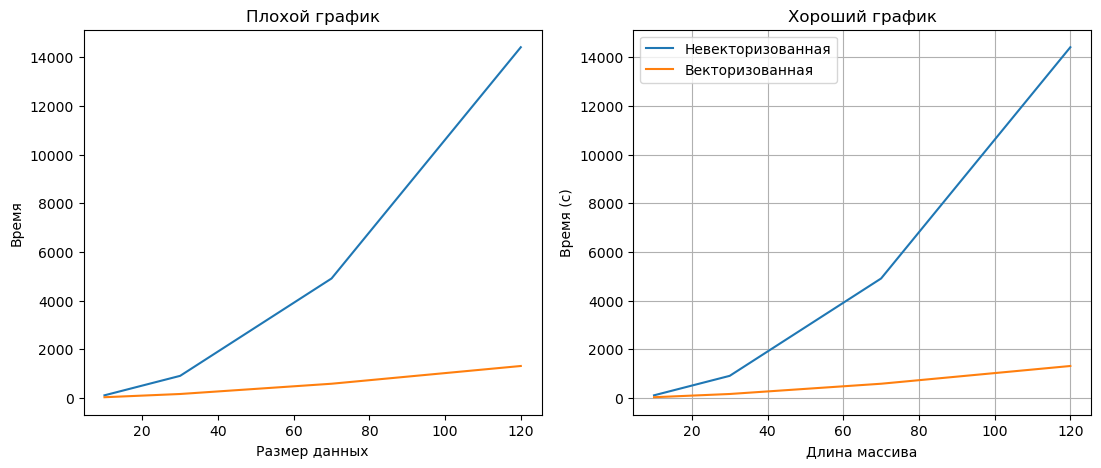

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

data_size = np.array([10, 30, 70, 120])
time_non_vectorized = data_size ** 2 + 10
time_vectorized = data_size ** 1.5

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.plot(data_size, time_non_vectorized)
ax1.plot(data_size, time_vectorized)
ax1.set_title(u"Плохой график")
ax1.set_xlabel(u"Размер данных")
ax1.set_ylabel(u"Время")

ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show()              

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ – 3.

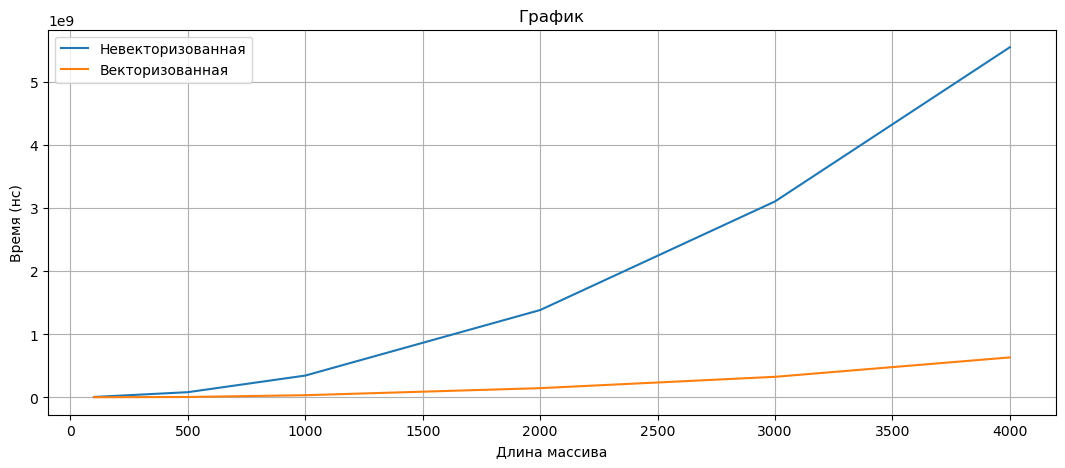

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import time
from functions import prod_non_zero_diag as f
from functions_vectorized import prod_non_zero_diag as fv

%matplotlib inline

sizes = [100, 500, 1000, 2000, 3000, 4000]
list_f = []
list_fv = []

for i in sizes:
    start_f = time.time_ns()
    m = [[np.random.rand() for _ in range(i)] for __ in range(i)]
    f(m)
    end_f = time.time_ns()
    time_f = end_f - start_f
    list_f.append(time_f)

    start_fv = time.time_ns()
    m_np = np.array(m)
    fv(m_np)
    end_fv = time.time_ns()
    time_fv = end_fv - start_fv
    list_fv.append(time_fv)

f, (ax) = plt.subplots(1, 1, figsize=(13, 5))
ax.plot(sizes, np.array(list_f), label=u"Невекторизованная")
ax.plot(sizes, np.array(list_fv), label=u"Векторизованная")
ax.set_title(u"График")
ax.set_xlabel(u"Длина массива")
ax.set_ylabel(u"Время (нс)")
ax.grid()
ax.legend()

 
 
* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ – True.
  
  


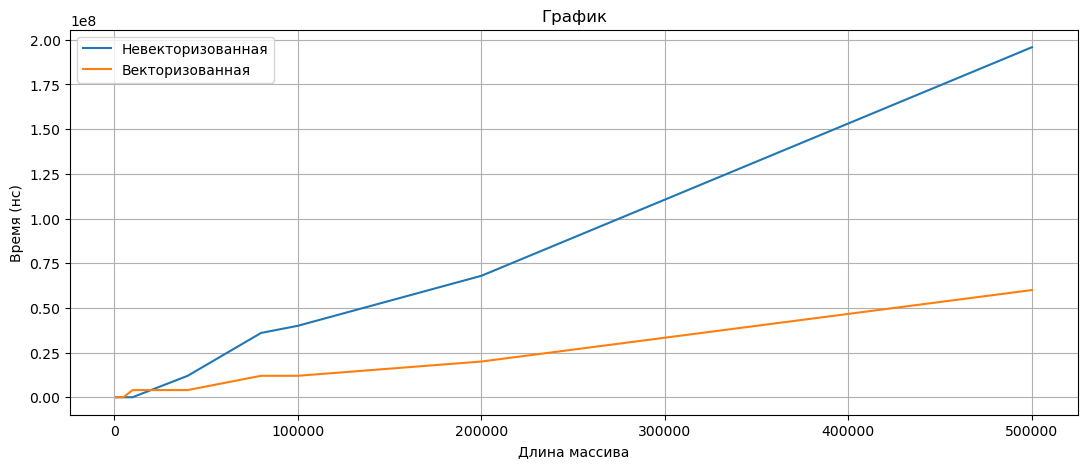

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import time
from functions import are_multisets_equal as f
from functions_vectorized import are_multisets_equal as fv

%matplotlib inline

sizes = [1000, 5000, 10000, 40000, 80000, 100000, 200000, 500000]
list_f = []
list_fv = []

for i in sizes:
    m1 = [np.random.randint(-1000000000, 1000000000) for _ in range(i)]
    m2 = [np.random.randint(-1000000000, 1000000000) for _ in range(i)]
    m_np1 = np.array(m1)
    m_np2 = np.array(m2)
    
    start_f = time.time_ns()
    f(m1, m2)
    end_f = time.time_ns()
    time_f = end_f - start_f
    list_f.append(time_f)

    start_fv = time.time_ns()
    fv(m_np1, m_np2)
    end_fv = time.time_ns()
    time_fv = end_fv - start_fv
    list_fv.append(time_fv)

f, (ax) = plt.subplots(1, 1, figsize=(13, 5))
ax.plot(sizes, np.array(list_f), label=u"Невекторизованная")
ax.plot(sizes, np.array(list_fv), label=u"Векторизованная")
ax.set_title(u"График")
ax.set_xlabel(u"Длина массива")
ax.set_ylabel(u"Время (нс)")
ax.grid()
ax.legend()

* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.  
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ – 5.

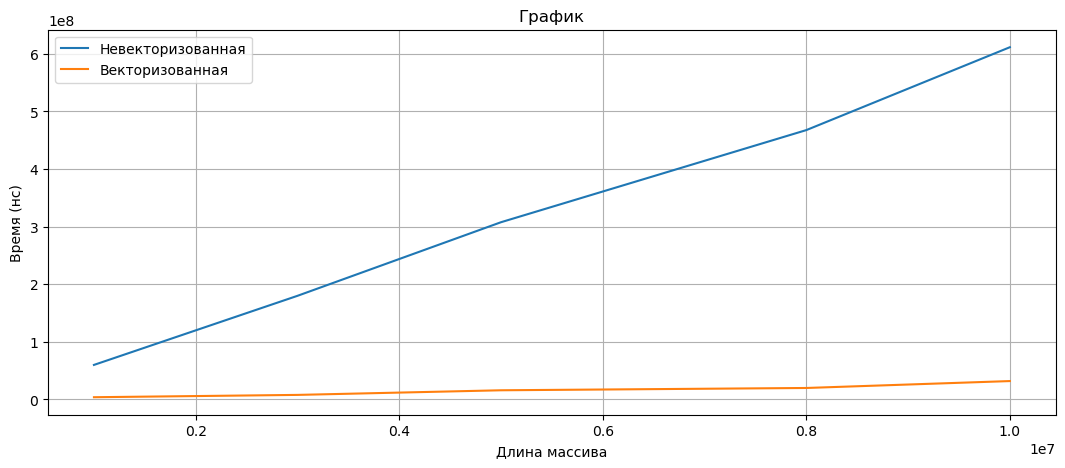

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from functions import max_after_zero as f
from functions_vectorized import max_after_zero as fv

%matplotlib inline

sizes = [1000000, 3000000, 5000000, 8000000, 10000000]
list_f = []
list_fv = []

for i in sizes:
    m = [np.random.randint(-2, 2) for _ in range(i)]
    m_np = np.array(m)
    
    start_f = time.time_ns()
    f(m)
    end_f = time.time_ns()
    time_f = end_f - start_f
    list_f.append(time_f)

    start_fv = time.time_ns()
    fv(m_np)
    end_fv = time.time_ns()
    time_fv = end_fv - start_fv
    list_fv.append(time_fv)

f, (ax) = plt.subplots(1, 1, figsize=(13, 5))
ax.plot(sizes, np.array(list_f), label=u"Невекторизованная")
ax.plot(sizes, np.array(list_fv), label=u"Векторизованная")
ax.set_title(u"График")
ax.set_xlabel(u"Длина массива")
ax.set_ylabel(u"Время (нс)")
ax.grid()
ax.legend()

 
 
* __ Задача 4__: Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). В ноутбуке приведите пример работы функции – преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow).


time non-vectorized: 735457600 ns
time vectorized: 39889100 ns


OSError: cannot write mode F as JPEG

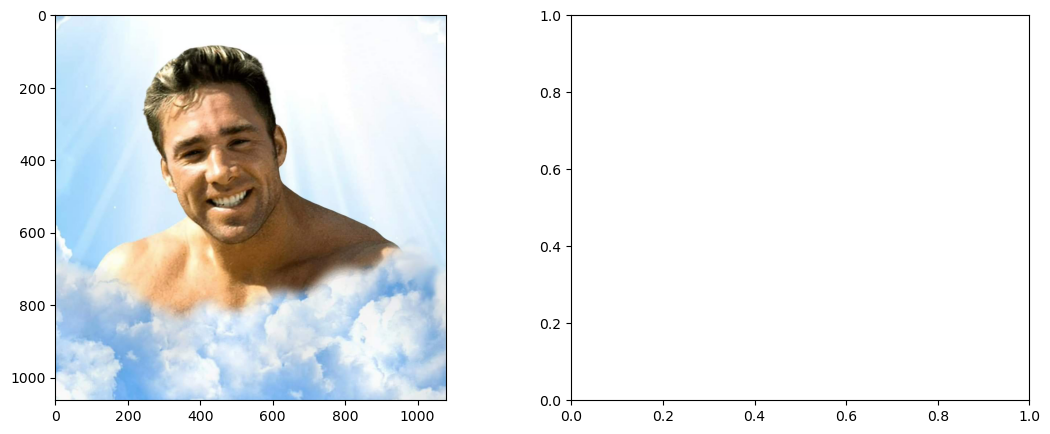

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import time
import imageio.v2 as imageio
from functions import convert_image as f
from functions_vectorized import convert_image as fv
coefs = np.array([0.299, 0.587, 0.114])

image1_np = imageio.imread('image.jpg')
image1 = image1_np.tolist()

start_f = time.time_ns()
image2 = f(image1, coefs)
end_f = time.time_ns()

start_fv = time.time_ns()
image3 = fv(image1_np, coefs)
end_fv = time.time_ns()

print("time non-vectorized: {} ns".format(end_f - start_f))
print("time vectorized: {} ns".format(end_fv - start_fv))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))
img1 = Image.open("image.jpg")
ax1.imshow(img1)
img2 = Image.fromarray(np.array(image2))
ax2.imshow(img2)

* __Задача 5__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ – (np.array([2, 3, 5]), np.array([3, 3, 1])).

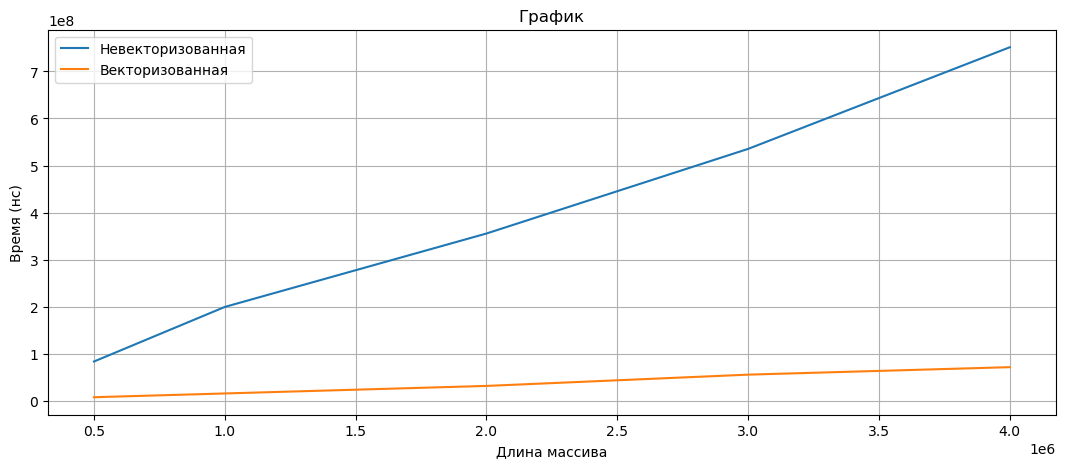

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from functions import run_length_encoding as f
from functions_vectorized import run_length_encoding as fv

%matplotlib inline

sizes = [500000, 1000000, 2000000, 3000000, 4000000]
list_f = []
list_fv = []

for i in sizes:
    m = [np.random.randint(-10 ** 9, 10 ** 9) for _ in range(i)]
    m_np = np.array(m)
    
    start_f = time.time_ns()
    f(m)
    end_f = time.time_ns()
    time_f = end_f - start_f
    list_f.append(time_f)

    start_fv = time.time_ns()
    fv(m_np)
    end_fv = time.time_ns()
    time_fv = end_fv - start_fv
    list_fv.append(time_fv)

f, (ax) = plt.subplots(1, 1, figsize=(13, 5))
ax.plot(sizes, np.array(list_f), label=u"Невекторизованная")
ax.plot(sizes, np.array(list_fv), label=u"Векторизованная")
ax.set_title(u"График")
ax.set_xlabel(u"Длина массива")
ax.set_ylabel(u"Время (нс)")
ax.grid()
ax.legend()

 
 
* __Задача 6__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Дополнительно сравните с функцией scipy.spatial.distance.cdist по скорости работы (сравнения приведите ниже в ноутбуке).

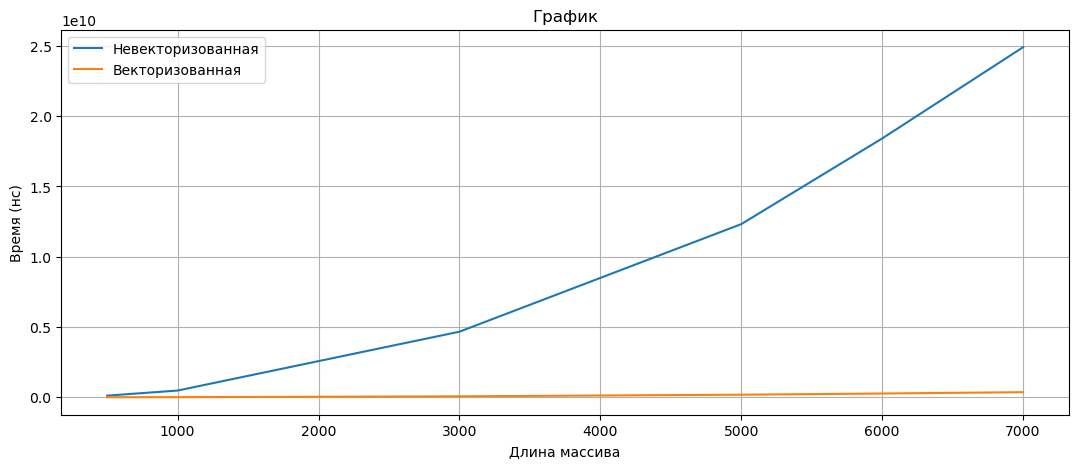

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from functions import pairwise_distance as f
from functions_vectorized import pairwise_distance as fv

%matplotlib inline

sizes = [500, 1000, 3000, 5000, 6000, 7000]
list_f = []
list_fv = []

for i in sizes:
    m1 = [[np.random.randint(-10 ** 9, 10 ** 9), np.random.randint(-10 ** 9, 10 ** 9)]  for _ in range(i)]
    m2 = [[np.random.randint(-10 ** 9, 10 ** 9), np.random.randint(-10 ** 9, 10 ** 9)]  for _ in range(i)]
    m_np1 = np.array(m1)
    m_np2 = np.array(m2)
    
    start_f = time.time_ns()
    f(m1, m2)
    end_f = time.time_ns()
    time_f = end_f - start_f
    list_f.append(time_f)

    start_fv = time.time_ns()
    fv(m_np1, m_np2)
    end_fv = time.time_ns()
    time_fv = end_fv - start_fv
    list_fv.append(time_fv)

f, (ax) = plt.subplots(1, 1, figsize=(13, 5))
ax.plot(sizes, np.array(list_f), label=u"Невекторизованная")
ax.plot(sizes, np.array(list_fv), label=u"Векторизованная")
ax.set_title(u"График")
ax.set_xlabel(u"Длина массива")
ax.set_ylabel(u"Время (нс)")
ax.grid()
ax.legend()

### Туториал по Markdown

__(1 балл)__

Напишите краткий (а в данной домашке ещё и почти бесмысленный) отчёт с использованием 4-5 различных вариантов разметки/выделения текста.

# Numpy
Если рассмотреть все полученные графики, **использование numpy сильно уменьшает время работы**.  
Он помогает делать сложные операции ***быстро и легко***.
> Я люблю Numpy.
> #### Почему я люблю Numpy?
>
> - Быстро работает.
> - Быстро пишется.